# Step 2: NLP Book Recommendation System - Exploratory Data Analysis

Amazon Books Reviews Data 
data source: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=books_data.csv 
This is a rich dataset for Natural Language Processing containing 3,000,000 text reviews from users as well as text descriptions and categories for 212,403 books. Therefore it is ideal for text analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#reading the data
books = pd.read_csv('books_wrangled.csv')

In [3]:
ratings = pd.read_csv('ratings_wrangled.csv')

In [51]:
books.head(3)

,Unnamed: 0,Title,review/score_Avg,review/score_Count,description,authors,publisher,publishedDate,categories
0,Its Only Art If Its Well Hung!,Its Only Art If Its Well Hung!,4.000000,1.0,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Dr. Seuss: American Icon,4.555556,9.0,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,Wonderful Worship in Smaller Churches,5.000000,4.0,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000,['Religion']


In [5]:
ratings.head(3)

,Unnamed: 0,Id,Title,User_id,review/helpfulness,review/score,review/summary,review/text
0,0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."


# Books data - additional cleaning

### Converting the publishedDate column to datetime with 4 digit year format

In [52]:
books['publishedDate'] = pd.to_datetime(books['publishedDate'], utc=True, errors='coerce').dt.year

In [53]:
books.head(3)

,Unnamed: 0,Title,review/score_Avg,review/score_Count,description,authors,publisher,publishedDate,categories
0,Its Only Art If Its Well Hung!,Its Only Art If Its Well Hung!,4.000000,1.0,NaN,['Julie Strain'],NaN,1996.0,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Dr. Seuss: American Icon,4.555556,9.0,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005.0,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,Wonderful Worship in Smaller Churches,5.000000,4.0,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000.0,['Religion']


### Books data - Handling missing values

In [54]:
books = books.drop(columns=['Unnamed: 0', 'publisher'])

In [56]:
books.head(2)

,Title,review/score_Avg,review/score_Count,description,authors,publishedDate,categories
0,Its Only Art If Its Well Hung!,4.000000,1.0,NaN,['Julie Strain'],1996.0,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,4.555556,9.0,Philip Nel takes a fascinating look into the k...,['Philip Nel'],2005.0,['Biography & Autobiography']


In [57]:
books.isna().sum()

Title                     1
review/score_Avg          1
review/score_Count        1
description           68442
authors               31413
publishedDate         25622
categories            41199
dtype: int64

In [62]:
avg_date = round(books['publishedDate'].mean())

In [64]:
books['publishedDate'] = books['publishedDate'].fillna(avg_date)
books.isna().sum()

Title                     1
review/score_Avg          1
review/score_Count        1
description           68442
authors               31413
publishedDate             0
categories            41199
dtype: int64

In [66]:
books['authors'] = books['authors'].fillna('unknown')
books.isna().sum()

Title                     1
review/score_Avg          1
review/score_Count        1
description           68442
authors                   0
publishedDate             0
categories            41199
dtype: int64

In [67]:
#drop rows with a null description or categories columns
books.dropna(inplace=True)

In [68]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137888 entries, 1 to 212402
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               137888 non-null  object 
 1   review/score_Avg    137888 non-null  float64
 2   review/score_Count  137888 non-null  float64
 3   description         137888 non-null  object 
 4   authors             137888 non-null  object 
 5   publishedDate       137888 non-null  float64
 6   categories          137888 non-null  object 
dtypes: float64(3), object(4)
memory usage: 8.4+ MB


# EDA - Books data

### Summary statistics for numerical columns

In [69]:
# Summary statistics for numerical columns

books.describe()

,review/score_Avg,review/score_Count,publishedDate
count,137888.000000,137888.000000,137888.000000
mean,4.264438,16.272663,2002.459054
std,0.793799,125.327202,14.208794
min,1.000000,1.000000,1720.000000
25%,4.000000,1.000000,1998.000000
50%,4.476190,3.000000,2004.000000
75%,5.000000,9.000000,2011.000000
max,5.000000,22023.000000,2030.000000


In [70]:
books_10_reviews = books[books['review/score_Count'] > 10]

array([[<AxesSubplot:title={'center':'review/score_Avg'}>,
        <AxesSubplot:title={'center':'review/score_Count'}>],
       [<AxesSubplot:title={'center':'publishedDate'}>, <AxesSubplot:>]],
      dtype=object)

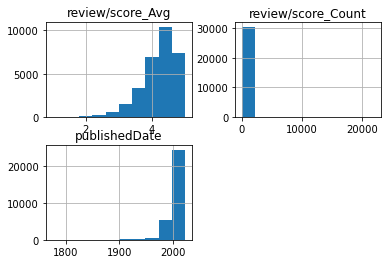

In [71]:
# Distribution of books that have more than 10 reviews
books_10_reviews.hist()

In [72]:
# Summary statistics for books which have more than 10 reviews.
books_10_reviews['review/score_Avg'].describe()

count    30514.000000
mean         4.205987
std          0.526836
min          1.000000
25%          3.937500
50%          4.300000
75%          4.584092
max          5.000000
Name: review/score_Avg, dtype: float64

In [73]:
books['review/score_Avg'].describe()

count    137888.000000
mean          4.264438
std           0.793799
min           1.000000
25%           4.000000
50%           4.476190
75%           5.000000
max           5.000000
Name: review/score_Avg, dtype: float64

In [74]:
# Only 30,514 out of the 137,888 books (which is 22%) have received more than 10 reviews.
# I expected the books with 10 or more reviews would be rated higher. 
# However, the Mean as well as the 50th percentile of ratings are lower for books with more than 10 reviews
# when compared to books with less than 10 reviews.
30514/137888

0.22129554420979344

### top authors - authors who received high number of reviews as well as high ratings

In [153]:
# top authors - authors who received high number of reviews as well as high ratings

books_100_reviews = books[books['review/score_Count'] > 100]

In [154]:
books_100_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 73 to 211994
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3109 non-null   object 
 1   review/score_Avg    3109 non-null   float64
 2   review/score_Count  3109 non-null   float64
 3   description         3109 non-null   object 
 4   authors             3109 non-null   object 
 5   publishedDate       3109 non-null   float64
 6   categories          3109 non-null   object 
dtypes: float64(3), object(4)
memory usage: 194.3+ KB


In [155]:
authors = books['authors'].unique()
authors = pd.DataFrame(authors)

In [156]:
# There are 97506 authors

authors.count()

0    97506
dtype: int64

In [159]:
# Average score by author for authors who received more than 100 reviews

author_avg_score = books_100_reviews.groupby('authors')['review/score_Avg'].mean()
author_avg_score.sort_values(ascending=False).head(10)

authors
['Michelle Cole']         5.000000
['Leonard Ravenhill']     4.970732
['Marian Cockrell']       4.948276
['Robb White']            4.946429
["Editors of Chase's"]    4.943038
['Arthur Bennett']        4.921788
['Alan Cambeira']         4.921429
['Ralph Moody']           4.916667
['E.B. Sledge']           4.911374
['Betty Crocker']         4.910064
Name: review/score_Avg, dtype: float64

Text(0.5, 1.0, 'Distribution of average rating score for authors who received more than 1000 reviews')

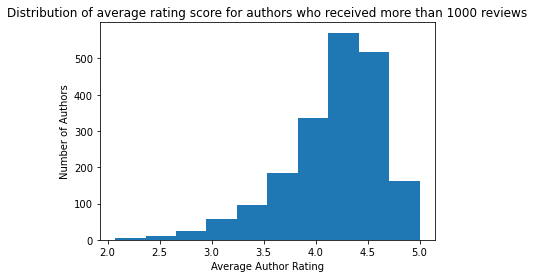

In [160]:
# Distribution of average rating scroe for authors who received more than 100 reviews
fig, ax = plt.subplots()
ax.hist(author_avg_score)
plt.xlabel('Average Author Rating')
plt.ylabel('Number of Authors')
plt.title('Distribution of average rating score for authors who received more than 1000 reviews')

### Authors with the highest number of reviews (excluding unknown authors)

In [162]:

author_tot_reviews = books[books['authors'] != 'unknown'].groupby('authors')['review/score_Count'].count()
author_tot_reviews = author_tot_reviews.sort_values(ascending = False)
author_tot_reviews.head(10)

authors
['Agatha Christie']         112
["Louis L'Amour"]           110
['William Shakespeare']     106
['Ann M. Martin']            65
['Carolyn Keene']            62
['Edgar Rice Burroughs']     59
['Various']                  58
['DK']                       55
['Nora Roberts']             52
['Mark Twain']               51
Name: review/score_Count, dtype: int64

In [89]:
author_tot_reviews.describe()

count    97505.000000
mean         1.396216
std          1.711806
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        112.000000
Name: review/score_Count, dtype: float64

In [90]:
print(author_tot_reviews.quantile(0.05))
print(author_tot_reviews.quantile(0.80))

1.0
1.0


In [301]:
# The highest number of reviews for a single author is 112. But most authors received only 1 review.

### Book Categories

In [91]:
# categories
categories = books.categories.value_counts()

In [92]:
categories.reset_index().head()

,index,categories
0,['Fiction'],22393
1,['History'],8845
2,['Religion'],8758
3,['Juvenile Fiction'],6572
4,['Biography & Autobiography'],6047


In [93]:
# number of categories

categories.count()

5415

In [94]:
# investigating if there are duplicate values with slightly different wording
categories[categories.index.str.contains('myster')]

['Detective and mystery stories']                     125
['Detective and mystery stories, English']             13
['Detective and mystery stories, American']            11
['Detective and mystery comic books, strips, etc']      4
['Detective and mystery stories, English.']             2
['Detective and mystery stories, American.']            2
['Detective and mystery plays, American']               1
['Detective and mystery television programs']           1
['Detective and mystery radio programs']                1
Name: categories, dtype: int64

In [95]:
# May be use text-processing on this column since the categories don't seem to be standardized.
# For example,'Detective and mystery stories, American' and  'Detective and mystery stories, American.'

### review/score_Avg and review/score_Count

Text(0, 0.5, 'Number of Ratings for a Book')

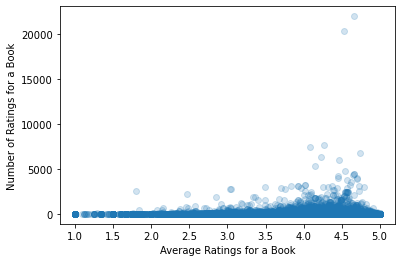

In [149]:
fig, ax = plt.subplots()
ax.plot(books['review/score_Avg'], books['review/score_Count'], marker='o', linestyle='None', alpha=0.2)
plt.xlabel('Average Ratings for a Book')
plt.ylabel('Number of Ratings for a Book')

In [100]:
score_count = books[['review/score_Avg', 'review/score_Count']]

In [101]:
score_count.corr()

,review/score_Avg,review/score_Count
review/score_Avg,1.000000,-0.008262
review/score_Count,-0.008262,1.000000


In [ ]:
# there seems to be a weak negative correlation between average rating score and total number of reviews.

# Ratings table - data cleaning

In [324]:
# Handling missing values. 


In [102]:
ratings.isna().sum()

Unnamed: 0                 0
Id                         0
Title                    208
User_id               561787
review/helpfulness         0
review/score               0
review/summary            38
review/text                8
dtype: int64

In [106]:
# Since this is a very large data, I will just drop the missing rows.

In [107]:
ratings = ratings.dropna(axis=0)

In [108]:
ratings.isna().sum()

Unnamed: 0            0
Id                    0
Title                 0
User_id               0
review/helpfulness    0
review/score          0
review/summary        0
review/text           0
dtype: int64

In [109]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2437988 entries, 0 to 2999998
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  object 
 2   Title               object 
 3   User_id             object 
 4   review/helpfulness  object 
 5   review/score        float64
 6   review/summary      object 
 7   review/text         object 
dtypes: float64(1), int64(1), object(6)
memory usage: 167.4+ MB


In [110]:
ratings = ratings.reset_index(drop=True)

In [112]:
ratings = ratings.drop(columns=['Unnamed: 0'], axis=1)

In [117]:
ratings.rename(columns={'Id': 'book_id'}, inplace=True)

In [118]:
ratings.head(3)

,book_id,Title,User_id,review/helpfulness,review/score,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."


# EDA - Ratings data

### Average ratings by user

In [119]:
user_avg_ratings = ratings.groupby('User_id')['review/score'].mean()

In [120]:
user_avg_ratings

User_id
A00109803PZJ91RLT7DPN    5.000000
A00117421L76WVWG4UX95    5.000000
A0015610VMNR0JC9XVL1     4.666667
A002258237PFYJV336T05    5.000000
A00264602WCXBHHFPLTQ4    5.000000
                           ...   
AZZZELE3I0CKD            5.000000
AZZZJY3RMN57G            5.000000
AZZZT14MS21I6            5.000000
AZZZYCR4NZADZ            5.000000
AZZZZW74AAX75            5.000000
Name: review/score, Length: 1008949, dtype: float64

### Number of ratings by user

In [121]:
user_tot_ratings = ratings.groupby('User_id')['review/score'].count()

In [129]:
user_tot_ratings.sort_values(ascending=False).head(11)

User_id
A14OJS0VWMOSWO    5795
AFVQZQ8PW0L       3606
A1D2C0WDCSHUWZ    3146
AHD101501WCN1     1995
A1X8VZWTOG8IS6    1804
A1K1JW1C5CUSUZ    1457
A20EEWWSFMZ1PN    1387
A1S3C5OFU508P3    1309
A1N1YEMTI9DJ86    1031
A2OJW07GQRNJUT    1001
A1L43KWWR05PCS     961
Name: review/score, dtype: int64

In [130]:
# 10 users have rated 1000 or more books each. This seems excessive, so I want to do a little digging.

In [133]:
# ratings by the user who rated 5795 books.

ratings[ratings['User_id'] == 'A14OJS0VWMOSWO'].head()

# These seem valid ratings.

,book_id,Title,User_id,review/helpfulness,review/score,review/summary,review/text
6,0826414346,Dr. Seuss: American Icon,A14OJS0VWMOSWO,3/4,5.0,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...
160,1884734766,Dealing With Disappointment: Helping Kids Cope...,A14OJS0VWMOSWO,16/17,5.0,Filled from cover to cover with practical guid...,Written by Elizabeth Crary (a parent educator ...
297,B000FZEKVA,Communicating with Orcas - The Whales' Perspec...,A14OJS0VWMOSWO,1/1,5.0,Makes for fascinating reading.,Whale naturalist and animal communicator Mary ...
384,B000MU831Q,Alternative Chicago: Unique Destinations Beyon...,A14OJS0VWMOSWO,16/16,5.0,"A unique, off-the-beaten-path travel guide and...","Unlike most travel guides on Chicago, Bill Fra..."
1242,1933112042,Chocolate: The Sweet History,A14OJS0VWMOSWO,4/5,5.0,"A delicious presentation indeed, packed with h...",Chocolate makers and company evolution are the...


In [134]:
ratings[ratings['User_id'] == 'AFVQZQ8PW0L'].head()

# 3606 ratings by this user, but the ratings seem genuine.

,book_id,Title,User_id,review/helpfulness,review/score,review/summary,review/text
617,050552421X,The Scarletti Curse (Candleglow),AFVQZQ8PW0L,7/7,5.0,Exciting gothic story line,"No female, whether they are of the blood or th..."
649,B000MCKQRS,Cruel and Unusual (G K Hall Large Print Book S...,AFVQZQ8PW0L,2/3,5.0,solid Scarpetta police procedural,"Henrico County, Virginia Detective Joe Trent c..."
1313,B000NRYUHO,Edge of Danger,AFVQZQ8PW0L,5/7,5.0,a fast-paced action thriller,The Rashids are half British and half Arab and...
1802,B000N6DDJQ,The Scarlet Letter A Romance,AFVQZQ8PW0L,2/2,5.0,Wayne Josephson provides a modernization of th...,"In seventeenth century Boston, scholar Roger C..."
2017,1902934229,Dead Sexy,AFVQZQ8PW0L,0/0,4.0,fun chick lit romp,Her students enter thirty-one years old music ...


In [135]:
user_tot_ratings.describe()

count    1.008949e+06
mean     2.416364e+00
std      1.213259e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.795000e+03
Name: review/score, dtype: float64

In [136]:
# 26,057 users have rated more than 10 books each. 

user_10_rating = user_tot_ratings[user_tot_ratings > 10]
user_10_rating

User_id
A00891092QIVH4W1YP46A    19
A01038432MVI9JXYTTK5T    24
A01254073JW8SSTKH6AIB    19
A0134066213WYQXLTVGYT    12
A035042126FPCW9EUHU1U    15
                         ..
AZYZ6338V6TLU            13
AZZ1E6SG4RAT7            19
AZZCSTUZ5EO4I            12
AZZUIE66HZNY1            13
AZZVZL4QEHEHO            25
Name: review/score, Length: 26057, dtype: int64

In [137]:
# Out of the total 1,008,949, 26,057  users (which is 2.6%) have given more than 10 reviews. 

26057/1008949

0.025825884162628637

In [138]:
# ratings

ratings.describe()

,review/score
count,2.437988e+06
mean,4.228280e+00
std,1.178650e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


Text(0.5, 1.0, 'Distribution of rating score for books')

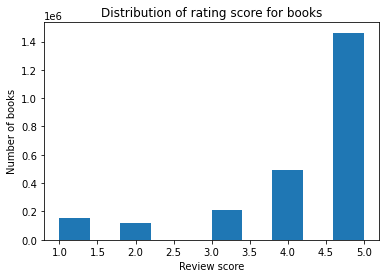

In [164]:
# Distribution of ratings
# This distribution has long left tail. Most people seem to rate 4 or 5.

fig, ax = plt.subplots()
ax.hist(ratings['review/score'])
plt.xlabel('Review score')
plt.ylabel('Number of books')
plt.title('Distribution of rating score for books')

In [140]:
# what is the average rating given by people who rate a lot, let's say more than 10 reviews.
ten_rating = ratings[ratings['User_id'].isin(user_10_rating.index)]



In [141]:
ten_rating['review/score'].mean()

4.25443960365501

In [142]:
ratings['review/score'].mean()

4.2282800407549175

In [ ]:
# People who rated more than 10 books gave a little higher average rating than the total user population who gave ratings.

In [143]:
books.to_csv('books_after_eda.csv')

In [144]:
ratings.to_csv('ratings_after_eda.csv')